# Module 4: Data Preprocessing

Data preprocessing consists of a broad set of techniques for cleaning, selecting, and transforming data to improve data mining analysis. Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## 4.1 Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using Pandas read_csv() function and display its first 5 data points.

**<font color="red">Code:</font>**

In [ ]:
import pandas as pd
data = pd.read_csv('credit_score.csv')

data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:

data = data.drop(['ID'],axis=1)
data.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### 4.1.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

**<font color="red">Code:</font>**

In [ ]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

data.shape

Number of instances = 100000
Number of attributes = 27


(100000, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  float64
 4   SSN                       100000 non-null  float64
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  float64
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_date       100000 non-null  fl

Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

**<font color="red">Code:</font>**

In [ ]:
data2 = data[['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']]

print('Before replacing missing values:')
print(data2[20:25])
numeric_data2 = data2.select_dtypes(include=np.number)

# Calculate medians for numeric columns
medians = numeric_data2.median()

# Fill NaN values in the original dataframe using medians of numeric columns
data2 = data2.fillna(medians)

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
    Customer_ID  Month    Name   Age          SSN    Occupation  \
20        11708      5  Langep  34.0  486853974.0      Engineer   
21        11708      6  Langep  34.0  486853974.0      Engineer   
22        11708      7  Langep  34.0  486853974.0      Engineer   
23        11708      8  Langep  34.0  486853974.0      Engineer   
24        47249      1  Jasond  54.0   72316145.0  Entrepreneur   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
20      143162.64           12187.220000                1.0              5.0   
21      143162.64           12187.220000                1.0              5.0   
22      143162.64           12187.220000                1.0              5.0   
23      143162.64           12187.220000                1.0              5.0   
24       30689.89            2612.490833                2.0              5.0   

    ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
20  ...        Go

Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 100000
Number of rows after discarding missing values = 100000


### 4.1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

**<font color="red">Code:</font>**

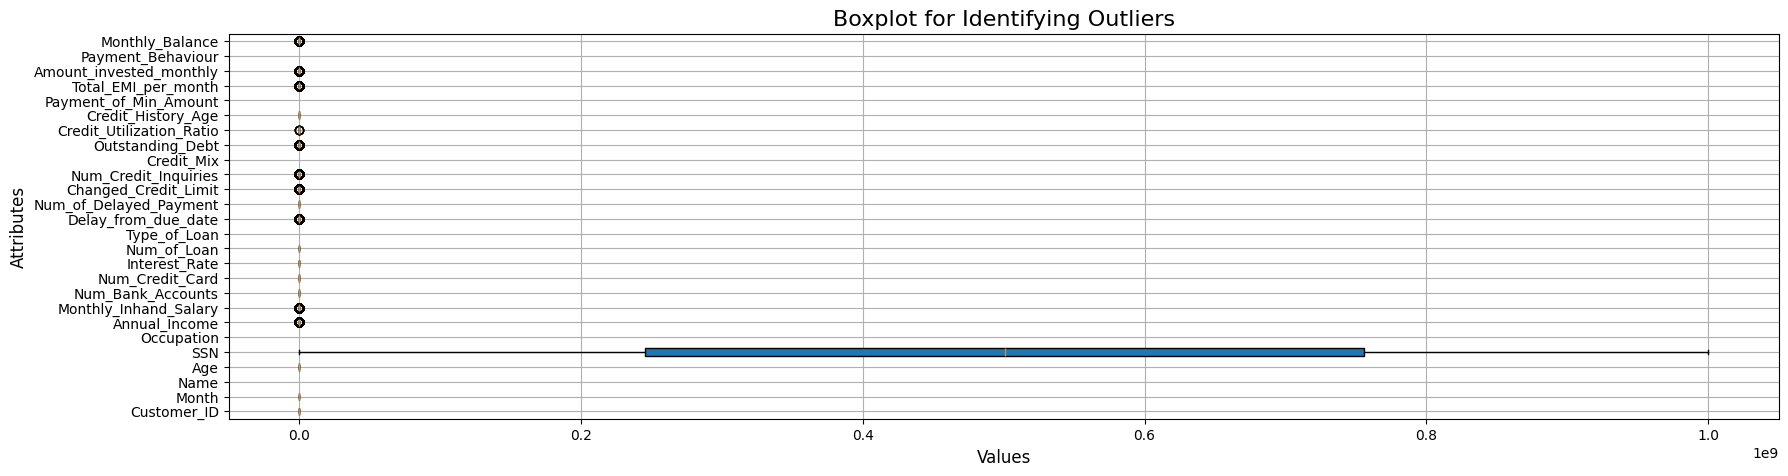

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data2 = data.drop(['Credit_Score'], axis=1)

# Convert non-numeric columns to numeric, if necessary
for column in data2.columns:
    if data2[column].dtype == 'object':
        data2[column] = pd.to_numeric(data2[column], errors='coerce')

# Extract numeric columns
numeric_data = data2.select_dtypes(include=['float64', 'int64'])

# Create the boxplot using plt.boxplot()
plt.figure(figsize=(20, 5))  # Set figure size for better visualization
plt.boxplot(numeric_data.values, vert=False, patch_artist=True, labels=numeric_data.columns)
plt.title('Boxplot for Identifying Outliers', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Attributes', fontsize=12)
plt.grid(True)
plt.show()

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

**<font color="red">Code:</font>**

The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
20,-0.995406,0.218217,NaN,0.063509,-0.046790,NaN,2.419293,2.507490,-1.684647,-0.258125,...,-0.723468,NaN,-0.106664,-0.177652,-0.042340,NaN,1.053120,2.904929,NaN,2.073290
21,-0.995406,0.654650,NaN,0.063509,-0.046790,NaN,2.419293,2.507490,-1.684647,-0.258125,...,-0.723468,NaN,-0.106664,1.465508,-0.032308,NaN,1.053120,2.904929,NaN,2.832712
22,-0.995406,1.091084,NaN,0.063509,-0.046790,NaN,2.419293,2.507490,-1.684647,-0.258125,...,-0.723468,NaN,-0.106664,1.130270,-0.022276,NaN,1.053120,2.904929,NaN,2.855691
23,-0.995406,1.527518,NaN,0.063509,-0.046790,NaN,2.419293,2.507490,-1.684647,-0.258125,...,-0.723468,NaN,-0.106664,1.190098,-0.012244,NaN,1.053120,2.904929,NaN,2.493381
24,1.482952,-1.527518,NaN,1.921414,-1.472167,NaN,-0.517377,-0.497352,-1.299040,-0.258125,...,-0.464925,NaN,-0.687162,-1.121963,-0.142660,NaN,-0.690147,-0.659062,NaN,0.202860


**<font color="red">Code:</font>**

The following code shows the results of discarding columns with Z > 3 or Z <= -3.

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 100000
Number of rows after discarding missing values = 0


In [ ]:
# Replace 'Age' with the column you want to analyze
column = 'Age'

# Check if the column exists in the dataset
if column in data2.columns:
    # Calculate IQR
    iqr = data2[column].quantile(0.75) - data2[column].quantile(0.25)
    iqr_max = (iqr * 1.5) + data2[column].quantile(0.75)
    iqr_min = data2[column].quantile(0.25) - (iqr * 1.5)

    # Print the IQR and bounds
    print(f"IQR for {column}: {iqr}")
    print(f"Upper Bound (IQR max): {iqr_max}")
    print(f"Lower Bound (IQR min): {iqr_min}")

    # Identify outliers
    outliers = data2[(data2[column] < iqr_min) | (data2[column] > iqr_max)]
    print(f"Outliers in {column}:\n", outliers)
else:
    print(f"Column '{column}' does not exist in the dataset.")


IQR for Age: 18.0
Upper Bound (IQR max): 69.0
Lower Bound (IQR min): -3.0
Outliers in Age:
 Empty DataFrame
Columns: [Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance]
Index: []

[0 rows x 26 columns]


In [ ]:
column = 'Age'
if column in data2.columns:
    # Calculate IQR
    iqr = data2[column].quantile(0.75) - data2[column].quantile(0.25)
    iqr_max = (iqr * 1.5) + data2[column].quantile(0.75)
    iqr_min = data2[column].quantile(0.25) - (iqr * 1.5)

    # Filter the dataset to include only rows within IQR bounds
    df = data2[(data2[column] < iqr_max) & (data2[column] > iqr_min)]

    # Display the filtered dataset
    print(f"Filtered dataset for column '{column}':")
    print(df)
    print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")
else:
    print(f"Column '{column}' does not exist in the dataset.")

Filtered dataset for column 'Age':
       Customer_ID  Month  Name   Age          SSN  Occupation  Annual_Income  \
0             3392      1   NaN  23.0  821000265.0         NaN       19114.12   
1             3392      2   NaN  23.0  821000265.0         NaN       19114.12   
2             3392      3   NaN  23.0  821000265.0         NaN       19114.12   
3             3392      4   NaN  23.0  821000265.0         NaN       19114.12   
4             3392      5   NaN  23.0  821000265.0         NaN       19114.12   
...            ...    ...   ...   ...          ...         ...            ...   
99995        37932      4   NaN  25.0   78735990.0         NaN       39628.99   
99996        37932      5   NaN  25.0   78735990.0         NaN       39628.99   
99997        37932      6   NaN  25.0   78735990.0         NaN       39628.99   
99998        37932      7   NaN  25.0   78735990.0         NaN       39628.99   
99999        37932      8   NaN  25.0   78735990.0         NaN       39628

### 4.1.3 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues.

**<font color="red">Code:</font>**

In the following example, we first check for duplicate instances in the breast cancer dataset.

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 0


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11,8625,4,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,...,Good,605.03,39.182656,322.0,No,18.816215,39.684018,Low_spent_Medium_value_payments,465.676224,Good
28,47249,5,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,...,Good,632.46,41.154317,211.0,No,16.415452,29.393311,Low_spent_Large_value_payments,359.374916,Standard


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 100000
Number of rows after discarding duplicates = 100000


## 4.2 Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.


**<font color="red">Code:</font>**


In [ ]:
df = pd.read_csv('credit_score.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
group = df.groupby('Occupation').sum()
group

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountant,563215620,177722200,30348,ParkmParkmParkmParkmParkmParkmParkmParkmWillia...,226486.0,3.312400e+12,3.420970e+08,2.843919e+07,35842.0,37484.0,...,StandardStandardStandardStandardStandardStanda...,9697195.52,217725.887131,1485889.0,YesYesYesYesNMYesYesYesYesYesYesYesYesYesYesYe...,747762.996548,377303.091931,High_spent_Large_value_paymentsLow_spent_Mediu...,2.658058e+06,StandardStandardStandardPoorPoorPoorPoorPoorSt...
Architect,545892028,174486984,30708,Dhanya SkariachanoDhanya SkariachanoDhanya Ska...,228356.0,3.512604e+12,3.539977e+08,2.945345e+07,36352.0,37206.0,...,StandardStandardStandardStandardStandardStanda...,9166040.96,220797.815793,1547245.0,YesNMYesYesYesYesYesYesNMYesYesYesYesYesYesYes...,739777.145083,385324.907656,High_spent_Large_value_paymentsHigh_spent_Medi...,2.725163e+06,StandardStandardStandardStandardStandardStanda...
Developer,542873376,180208320,30240,DeepaaDeepaaDeepaaDeepaaDeepaaDeepaaDeepaaDeep...,223723.0,3.384563e+12,3.368630e+08,2.797797e+07,35921.0,37765.0,...,StandardStandardStandardStandardStandardStanda...,9681056.88,216804.160929,1472403.0,YesNMYesYesYesYesYesYesNoNoNoNoNoNoNoNMYesYesY...,704282.379122,366912.362101,High_spent_Medium_value_paymentsHigh_spent_Med...,2.648006e+06,StandardStandardStandardStandardStandardStanda...
Doctor,523450940,172064088,29556,Charlie ZhurCharlie ZhurCharlie ZhurCharlie Zh...,217196.0,3.294068e+12,3.252326e+08,2.706330e+07,35378.0,36065.0,...,GoodGoodGoodGoodGoodGoodGoodGoodStandardStanda...,9537714.72,211674.651213,1446021.0,NoNMNMNoNoNMNoNoNoNMNMNoNoNoNMNMYesYesYesYesYe...,729834.817816,357492.014047,High_spent_Small_value_paymentsHigh_spent_Larg...,2.543834e+06,GoodGoodGoodGoodStandardGoodGoodStandardStanda...
Engineer,566643384,174069464,30888,LangepLangepLangepLangepLangepLangepLangepLang...,223241.0,3.568116e+12,3.482152e+08,2.894045e+07,36969.0,37997.0,...,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,9965522.96,222475.014927,1492669.0,NoNoNoNoNoNoNoNoNoNMNoNoNoNoNoNoYesYesYesYesYe...,719339.795338,368150.247321,High_spent_Small_value_paymentsHigh_spent_Smal...,2.715638e+06,GoodGoodGoodGoodGoodGoodStandardStandardStanda...
Entrepreneur,534296052,167166528,29916,JasondJasondJasondJasondJasondJasondJasondJaso...,221711.0,3.331068e+12,3.389662e+08,2.816802e+07,35757.0,37052.0,...,GoodGoodGoodGoodGoodGoodGoodGoodStandardStanda...,9287657.28,214219.021801,1480015.0,NoNoNMNoNoNoNoNoYesYesNMYesYesYesYesYesNMYesYe...,757234.850824,368364.659652,Low_spent_Large_value_paymentsLow_spent_Small_...,2.583144e+06,StandardStandardStandardStandardStandardStanda...
Journalist,516120940,167939432,29412,JamesjJamesjJamesjJamesjJamesjJamesjJamesjJame...,221745.0,3.257281e+12,3.165391e+08,2.632067e+07,35236.0,36466.0,...,GoodGoodGoodGoodGoodGoodGoodGoodBadBadBadBadBa...,9469939.84,210345.396965,1475280.0,NMNoNoNoNoNoNoNoYesYesYesYesYesYesYesYesNoNoNo...,652264.393748,347767.797764,High_spent_Small_value_paymentsLow_spent_Small...,2.524243e+06,GoodGoodGoodGoodGoodGoodGoodGoodPoorStandardSt...
Lawyer,571255028,183738944,31932,NpNpNpNpNpNpNpNpNadiaqNadiaqNadiaqNadiaqNadiaq...,240759.0,3.532952e+12,3.519206e+08,2.926546e+07,37152.0,38900.0,...,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,9588767.76,228545.662362,1564737.0,NoNMNoNoNoNoNoNoNMNoNMNoNoNoNoNoYesYesYesYesYe...,729256.595528,387868.325038,High_spent_Large_value_paymentsLow_spent_Mediu...,2.772572e+06,GoodGoodGoodGoodGoodGoodStandardGoodGoodGoodGo...
Manager,521325168,171549968,28944,Sinead CarewsSinead CarewsSinead CarewsSinead ...,211523.0,3.127394e+12,3.310343e+08,2.747740e+07,34700.0,35218.0,...,StandardStandardStandardStandardStandardStanda...,9404258.24,208383.182830,1429606.0

## 4.3 Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In the example below, we will apply sampling with replacement and without replacement to the breast cancer dataset obtained from the UCI machine learning repository.

**<font color="red">Code:</font>**

We initially display the first five records of the table.

In [ ]:
data.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(n=3)
sample

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99879,14421,8,Xolai,27.0,963557106.0,Scientist,118677.54,9963.795000,4.0,4.0,...,Good,995.47,39.747228,366.0,No,237.106366,94.757926,High_spent_Medium_value_payments,801.752296,Good
68925,17404,6,Poornimag,29.0,1988608.0,Architect,134951.25,10311.799181,1.0,4.0,...,Good,496.32,33.003339,354.0,No,1070.973924,102.009878,High_spent_Medium_value_payments,707.370831,Good
73192,26066,1,Nia Williamsf,22.0,659770885.0,Entrepreneur,16844.13,1156.677500,2.0,7.0,...,Good,1269.39,28.934786,397.0,No,0.000000,41.864983,Low_spent_Medium_value_payments,279.987874,Standard


In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
43660,23281,5,Lewisb,38.0,620055524.0,Doctor,40026.12,3074.173535,6.0,10.0,...,Bad,1472.86,25.716484,215.0,Yes,315.460250,31.131672,High_spent_Medium_value_payments,240.185738,Standard
87278,34750,7,Novakz,46.0,268755454.0,Doctor,75868.80,6074.400000,6.0,10.0,...,Bad,1432.71,34.735760,178.0,Yes,297.547446,42.703732,High_spent_Medium_value_payments,334.634720,Poor
14317,34156,6,Oreskovicx,32.0,448647747.0,Journalist,83311.60,7081.633333,10.0,7.0,...,Bad,3729.42,31.137852,163.0,Yes,474.582366,62.084223,High_spent_Small_value_payments,109.493232,Poor
81932,3448,5,Brenda Gohc,26.0,884856493.0,Engineer,83642.91,6148.311617,3.0,5.0,...,Standard,793.04,42.016932,237.0,Yes,882.930883,52.921491,High_spent_Medium_value_payments,737.640337,Good
95321,1593,2,Adamh,48.0,439547865.0,Architect,109322.70,9248.225000,5.0,3.0,...,Good,387.99,38.134661,309.0,No,58.170621,204.219009,Low_spent_Medium_value_payments,348.134510,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29559,9195,8,Younglair,24.0,929731862.0,Musician,109905.96,9096.830000,8.0,4.0,...,Standard,150.87,40.604555,248.0,Yes,90.582866,187.289315,Low_spent_Medium_value_payments,826.170019,Poor
96320,2361,1,Slodkowskih,33.0,785297879.0,Writer,29491.38,2525.615000,7.0,9.0,...,Standard,1593.63,25.895430,166.0,Yes,96.298496,39.601007,High_spent_Small_value_payments,275.023994,Poor
38431,38033,8,Alister Bullh,38.0,837680928.0,Scientist,31608.12,2441.010000,10.0,8.0,...,Bad,3487.36,34.655081,84.0,Yes,83.091380,39.001504,High_spent_Small_value_payments,366.376075,Poor
48756,20283,5,Karen Freifeldi,51.0,360583081.0,Accountant,44551.13,3539.594167,0.0,5.0,...,Good,945.42,34.848044,210.0,NM,127.759721,76.538039,Low_spent_Medium_value_payments,311.847276,Poor


Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98539,37385,4,Richwinet,29.0,392365114.0,Architect,60529.080,5069.090000,5.0,3.0,...,Standard,2329.34,24.420921,193.0,Yes,317.580668,60.109327,High_spent_Medium_value_payments,379.219005,Poor
77708,9668,5,Zieminskia,40.0,967735542.0,Accountant,14717.280,1069.440000,5.0,2.0,...,Good,148.52,25.735142,255.0,No,31.083719,17.478496,Low_spent_Medium_value_payments,304.623566,Good
5192,29606,1,Kenf,36.0,334409481.0,Architect,52979.400,4366.950000,9.0,8.0,...,Bad,2861.75,34.731537,97.0,NM,252.902066,77.415969,Low_spent_Small_value_payments,295.930244,Standard
98047,25451,8,Somasundaramd,24.0,353928877.0,Architect,24723.630,2234.302500,5.0,5.0,...,Standard,327.48,38.517802,208.0,No,11.481055,41.535079,High_spent_Medium_value_payments,372.895097,Standard
50057,42363,2,Temple-Westi,28.0,872671118.0,Teacher,20616.630,1784.052500,6.0,6.0,...,Bad,3389.04,36.698438,126.0,Yes,70.572957,38.697449,Low_spent_Large_value_payments,308.938604,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11090,48740,3,Siddharth Cavaleo,30.0,525041437.0,Engineer,12025.045,1263.087083,5.0,4.0,...,Standard,843.67,25.191407,253.0,Yes,27.775905,20.612984,Low_spent_Small_value_payments,345.595282,Standard
24876,17242,5,Susans,52.0,295350003.0,Architect,42103.180,3327.598333,4.0,2.0,...,Good,725.53,31.000286,383.0,No,42.468579,40.402048,Low_spent_Small_value_payments,364.085778,Good
65344,19605,1,asil Katzh,20.0,397403219.0,Architect,25444.950,2342.412500,8.0,6.0,...,Standard,249.67,27.094122,190.0,Yes,30.781695,25.766590,High_spent_Medium_value_payments,357.008026,Standard
32293,20418,6,Olesya Dmitracovae,50.0,457549004.0,Scientist,85770.330,7275.527500,5.0,5.0,...,Good,1280.08,29.256127,217.0,No,144.429302,122.616270,Low_spent_Medium_value_payments,614.300775,Poor


## 4.4 Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.

**<font color="red">Code:</font>**

,count
Annual_Income,
19114.12,8
34847.84,8
143162.64,8
30689.89,8
35547.71,8
...,...
42903.79,8
16680.35,8
37188.10,8


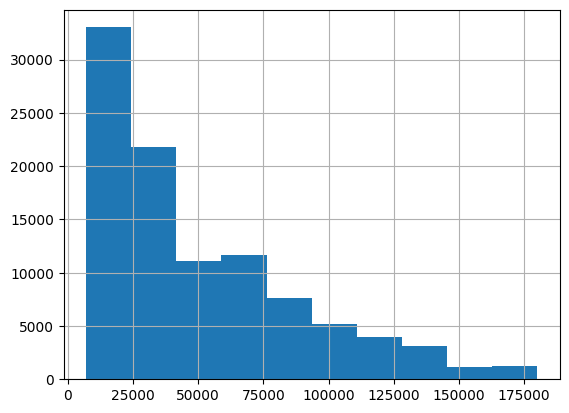

In [ ]:
data['Annual_Income'].hist(bins=10)
data['Annual_Income'].value_counts(sort=False)

For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths. The value_counts() function can be used to determine the number of instances in each bin.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.cut(data['Annual_Income'],8)
bins.value_counts(sort=False)

,count
Annual_Income,
"(6832.949, 28628.599]",36448
"(28628.599, 50251.268]",24440
"(50251.268, 71873.936]",14280
"(71873.936, 93496.605]",10120
"(93496.605, 115119.274]",6096
"(115119.274, 136741.942]",4960
"(136741.942, 158364.611]",2080
"(158364.611, 179987.28]",1576


For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.qcut(data['Annual_Income'],8)
bins.value_counts(sort=False)

,count
Annual_Income,
"(7005.929, 15094.925]",12504
"(15094.925, 19342.972]",12496
"(19342.972, 29343.05]",12504
"(29343.05, 36999.705]",12496
"(36999.705, 53876.88]",12504
"(53876.88, 71683.47]",12496
"(71683.47, 100809.78]",12504
"(100809.78, 179987.28]",12496


## PCA

In [ ]:
data2 = data.dropna()
X = data2[data2.columns[:9]]
y = data2['Credit_Score']
X

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts
0,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0
1,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0
2,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0
3,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0
4,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0
...,...,...,...,...,...,...,...,...,...
99995,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0
99996,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0
99997,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0
99998,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data2' is your DataFrame

# Select only numeric columns before applying PCA
X_numeric = data2.select_dtypes(include=['number'])

# Keep only the first 9 numeric features if needed
X_numeric = X_numeric[X_numeric.columns[:9]]

# Check what your X_numeric looks like
display(X_numeric)

# Now proceed with PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_numeric)

,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate
0,3392,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0
1,3392,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0
2,3392,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0
3,3392,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0
4,3392,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0
99996,37932,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0
99997,37932,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0
99998,37932,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0


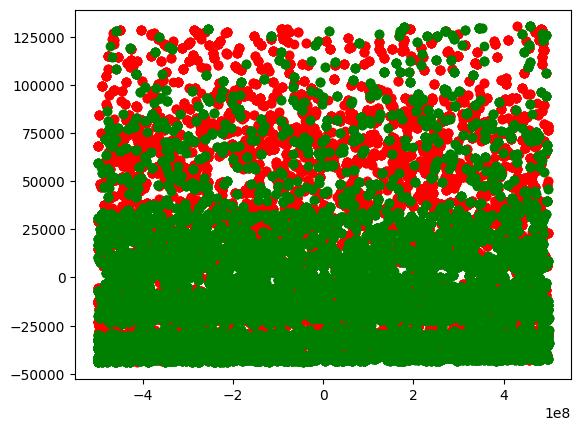

In [ ]:
colors = ["r", "g"]
labels = ["Class 1", "Class 2"]  # Adjust labels as needed

# Correct the indexing
for i, color, label in zip(np.unique(y), colors, labels):
    # Use .iloc to index the DataFrame properly
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], color=color, label=label)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = data2[data2.columns[:9]]
y = data2['Credit_Score']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code) ...

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'Occupation' column (or any other categorical columns)
X['Occupation'] = encoder.fit_transform(X['Occupation'])

# Now apply SelectKBest
model = SelectKBest(score_func=chi2, k=4)
X_new = model.fit_transform(X, y)
X_new

<ipython-input-67-0d1fe2106ff9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Occupation'] = encoder.fit_transform(X['Occupation'])


array([[3.39200000e+03, 8.21000265e+08, 1.91141200e+04, 1.82484333e+03],
       [3.39200000e+03, 8.21000265e+08, 1.91141200e+04, 1.82484333e+03],
       [3.39200000e+03, 8.21000265e+08, 1.91141200e+04, 1.82484333e+03],
       ...,
       [3.79320000e+04, 7.87359900e+07, 3.96289900e+04, 3.35941583e+03],
       [3.79320000e+04, 7.87359900e+07, 3.96289900e+04, 3.35941583e+03],
       [3.79320000e+04, 7.87359900e+07, 3.96289900e+04, 3.35941583e+03]])

In [ ]:
data2

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'credit_score.csv' is your dataset file
data = pd.read_csv('credit_score.csv')  # Load the data

# *** Data Preprocessing ***
# Handling outliers and missing values
cols_outliers = []  # To store columns with outliers

for col in data.select_dtypes(include=np.number).columns:  # Only numeric columns
    median_data_col = data[col].median()  # Median of the column
    Q1 = np.percentile(data[col].dropna(), 25)  # 25th percentile (Q1)
    Q3 = np.percentile(data[col].dropna(), 75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range (IQR)
    Upper = Q3 + (1.5 * IQR)  # Upper bound
    Lower = Q1 - (1.5 * IQR)  # Lower bound

    col_outliers = []  # List to store outliers for the current column
    for i in data[col].index:  # Iterate through rows
        value = data.at[i, col]
        if value > Upper or value < Lower:  # Identify outliers
            col_outliers.append(value)
            data.at[i, col] = median_data_col  # Replace outlier with median

    if len(col_outliers) > 0:  # If outliers exist for the column
        cols_outliers.append(col)
        print(f"Outliers in column '{col}': {len(col_outliers)} replaced with median.")

# Checking for missing values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

Outliers in column 'Annual_Income': 2000 replaced with median.
Outliers in column 'Monthly_Inhand_Salary': 2017 replaced with median.
Outliers in column 'Delay_from_due_date': 4002 replaced with median.
Outliers in column 'Changed_Credit_Limit': 579 replaced with median.
Outliers in column 'Num_Credit_Inquiries': 787 replaced with median.
Outliers in column 'Outstanding_Debt': 5272 replaced with median.
Outliers in column 'Credit_Utilization_Ratio': 4 replaced with median.
Outliers in column 'Total_EMI_per_month': 5044 replaced with median.
Outliers in column 'Amount_invested_monthly': 4464 replaced with median.
Outliers in column 'Monthly_Balance': 7400 replaced with median.

Missing values in each column:

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Acc